In [5]:
import Pkg; Pkg.add("SpecialFunctions")


 Installing known registries into `C:\Users\tomer\.julia`
      Added registry `General` to `C:\Users\tomer\.julia\registries\General`
  Resolving package versions...
  Installed Rmath_jll ──────── v0.2.2+2
  Installed Qt_jll ─────────── v5.15.2+2
  Installed SpecialFunctions ─ v1.3.0
Updating `C:\Users\tomer\.julia\environments\v1.5\Project.toml`
  [276daf66] + SpecialFunctions v1.3.0
Updating `C:\Users\tomer\.julia\environments\v1.5\Manifest.toml`
  [ede63266] ↑ Qt_jll v5.15.2+1 ⇒ v5.15.2+2
  [f50d1b31] ↑ Rmath_jll v0.2.2+1 ⇒ v0.2.2+2
  [276daf66] ↑ SpecialFunctions v1.2.1 ⇒ v1.3.0


D = gammaln(sum(alpha)) – gammaln(sum(beta)) – sum(gammaln(alpha)) + …
sum(gammaln(beta)) + (alpha – beta) * (psi(alpha) – psi(sum(alpha)))’;

In [22]:
import Pkg; Pkg.add("PyPlot")

   Updating registry at `C:\Users\tomer\.julia\registries\General`
  Resolving package versions...
  Installed Qt_jll ─ v5.15.2+3
  Installed PyPlot ─ v2.9.0
  Installed PyCall ─ v1.92.3
Updating `C:\Users\tomer\.julia\environments\v1.5\Project.toml`
  [d330b81b] + PyPlot v2.9.0
Updating `C:\Users\tomer\.julia\environments\v1.5\Manifest.toml`
  [438e738f] + PyCall v1.92.3
  [d330b81b] + PyPlot v2.9.0
  [ede63266] ↑ Qt_jll v5.15.2+2 ⇒ v5.15.2+3
   Building PyCall → `C:\Users\tomer\.julia\packages\PyCall\BD546\deps\build.log`


In [54]:
using PyPlot

In [12]:
using SpecialFunctions

In [38]:
function kldivergence(alpha, beta)
    alpha_0 = sum(alpha)
    beta_0 = sum(beta)
    return loggamma(alpha_0) - loggamma(beta_0)-sum(loggamma.(alpha))+sum(loggamma.(beta))+
    transpose(alpha-beta)*(digamma.(alpha)- fill(digamma(alpha_0), length(alpha)))
end

kldivergence (generic function with 1 method)

In [42]:
kldivergence([1,2,3],[1,4,6])

0.48584986782334916

In [16]:
alphax = [1,1,1]
betax = [1,2,1]

3-element Array{Int64,1}:
 1
 2
 1

In [17]:
alphax_0 = sum(alphax)
betax_0 = sum(betax)

4

In [20]:
c = loggamma(alphax_0) - loggamma(betax_0)

-1.0986122886681096

In [21]:
b = -sum(loggamma.(alphax))+sum(loggamma.(betax))

0.0

In [22]:
b+c

-1.0986122886681096

In [24]:
d = (alphax-betax)

3-element Array{Int64,1}:
  0
 -1
  0

In [25]:
digamma.(alphax)

3-element Array{Float64,1}:
 -0.5772156649015315
 -0.5772156649015315
 -0.5772156649015315

In [27]:
fill(3.3,length(alphax))

3-element Array{Float64,1}:
 3.3
 3.3
 3.3

In [33]:
e = (digamma.(alphax)- fill(digamma(alphax_0), length(alphax)))

3-element Array{Float64,1}:
 -1.5000000000000002
 -1.5000000000000002
 -1.5000000000000002

In [36]:
transpose(d)*e

1.5000000000000002

In [37]:
transpose(d)

1×3 LinearAlgebra.Transpose{Int64,Array{Int64,1}}:
 0  -1  0

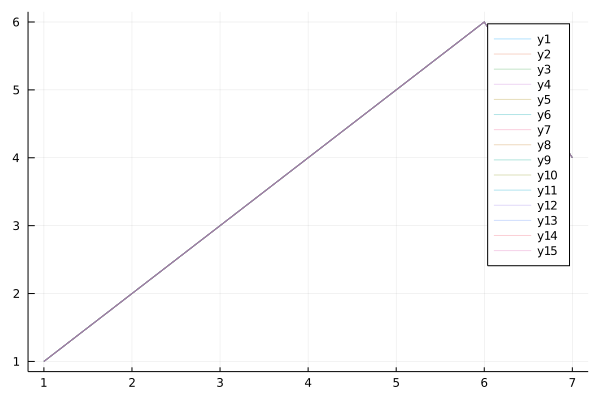

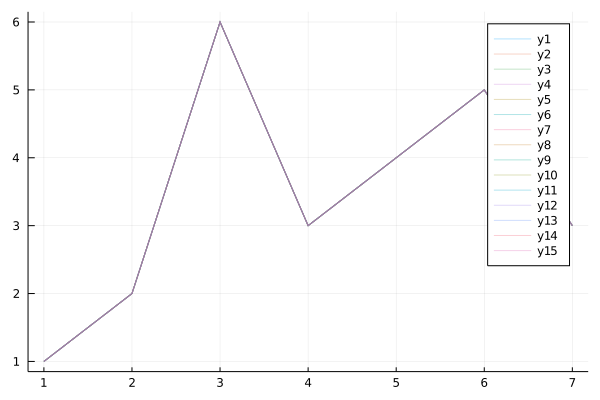

In [50]:
plt1 = plot()
plt2 = plot()
score_result = []
scores = [1,2,3,4,5,6,4]
div_result = []
divs = [1,2,6,3,4,5,3]
for i in 1:5
    push!(score_result, scores)
    push!(div_result, divs)
    plot!(plt1, score_result, alpha = 0.3)
    plot!(plt2, div_result, alpha = 0.3)
end
display(plt1)
display(plt2)

## Monte Carlo Simulations

In [3]:
# Import libraries.
using Turing, StatsPlots, Random, Memoization, StatsBase, Statistics

In [6]:
weights = [1,1,1]
weights = Weights(weights/sum(weights))
idx = sample(collect(1:length(weights)), weights, 100)

100-element Array{Int64,1}:
 1
 3
 3
 2
 2
 3
 1
 1
 2
 3
 1
 2
 3
 ⋮
 1
 3
 2
 3
 2
 1
 1
 2
 3
 2
 3
 1

In [5]:
sample()

sample (generic function with 38 methods)

In [8]:
NUM_OF_SIMULATIONS = 100

100

In [10]:
function mc_simulation(first_policy, second_policy)
    first_weights = Weights(first_policy/sum(first_policy))
    first_moves = sample(collect(1:length(first_weights)), first_weights, NUM_OF_SIMULATIONS)
    second_weights = Weights(second_policy/sum(second_policy))
    second_moves = sample(collect(1:length(second_weights)), second_weights, NUM_OF_SIMULATIONS)
    return compute_score(first_moves, second_moves)
end

mc_simulation (generic function with 1 method)

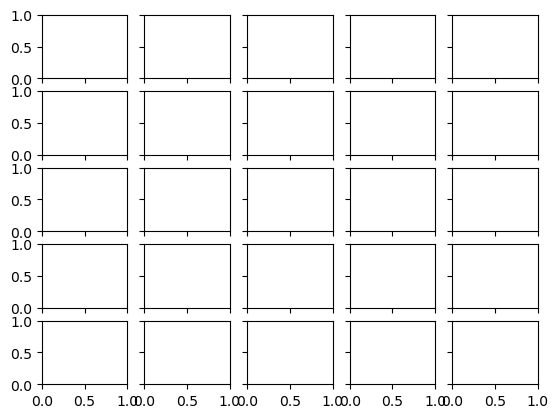

(Figure(PyObject <Figure size 640x480 with 25 Axes>), PyCall.PyObject[PyObject <AxesSubplot:> PyObject <AxesSubplot:> … PyObject <AxesSubplot:> PyObject <AxesSubplot:>; PyObject <AxesSubplot:> PyObject <AxesSubplot:> … PyObject <AxesSubplot:> PyObject <AxesSubplot:>; … ; PyObject <AxesSubplot:> PyObject <AxesSubplot:> … PyObject <AxesSubplot:> PyObject <AxesSubplot:>; PyObject <AxesSubplot:> PyObject <AxesSubplot:> … PyObject <AxesSubplot:> PyObject <AxesSubplot:>])

In [76]:
using Statistics

In [80]:
for my_depth in -1:4
   for opponent_depth in -1:my_depth
        y1 = rand(10, 2)
        y_mean = mean(y)
        y_std = std(y)
        plot(y_mean)
    end
end

LoadError: Cannot convert Float64 to series data for plotting

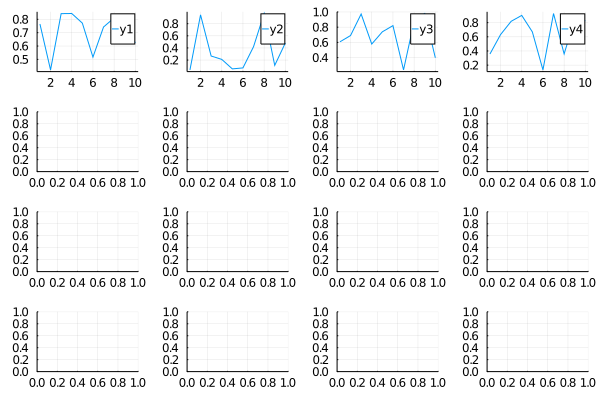

In [11]:
x = 1:10;
y = rand(10, 4)
plot(x, y, layout = (4, 4))